# Solução de equações diferenciais ordinarias (EDO)

## Aplicações

Veremos agora vários exemplos de como usar o método de Runge-Kutta, RK4, para resolver sistemas de equações diferenciais ordinárias. 

A função `RK4` permite evoluir unicamente uma variável, assim, deveriamos chamar ela várias vezes quando não temos uma senão várias EDO acopladas. 

podemos fazer uso de uma versão vetorizada da rotina RK4, que permite evoluir $m$ variáveis simultaneamente.

In [5]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
def rk4vec( t0, m, u0, dt, f ):
    
    import numpy as np
    
    f0 = f ( t0, m, u0 )
    t1 = t0 + dt / 2.0
    u1 = np.zeros ( m )
    u1[0:m] = u0[0:m] + dt * f0[0:m] / 2.0
    f1 = f ( t1, m, u1 )
    
    t2 = t0 + dt / 2.0
    u2 = np.zeros ( m )
    u2[0:m] = u0[0:m] + dt * f1[0:m] / 2.0
    f2 = f ( t2, m, u2 )
    
    t3 = t0 + dt
    u3 = np.zeros ( m )
    u3[0:m] = u0[0:m] + dt * f2[0:m]
    f3 = f ( t3, m, u3 )
    
    u = np.zeros ( m )
    u[0:m] = u0[0:m] + ( dt / 6.0 ) * ( \
                                       f0[0:m] \
                                       + 2.0 * f1[0:m] \
                                       + 2.0 * f2[0:m] \
                                       +       f3[0:m] )
    return u

### Movimento de um projetil

O primeiro caso que vamos estudar é o movimento de um projetil.

As equações que governam o movimento são as seguinte:

$$
\frac{d^2x}{dt^2} = 0\; \;, \frac{d^2y}{dt^2} =0 \; \;, \frac{d^2z}{dt^2} = -g
$$

Para facilitar o problema podemos podemos trabalhar em duas dimensões, $x$ e $y$. Convertimos também as equações de segunda ordem em duas equaçòes de primeira ordem.

$$
\frac{d v_x}{dt} = 0 \; \;,  \frac{d v_z}{dt} = -g
$$

$$
\frac{d x}{dt} = v_x \; \;,  \frac{d z}{dt} = v_z
$$

Dessa forma temos 4 equações diferenciais acopladas. Precisamos um programa principal onde chamar a rotina RK4vec e uma função que contenha as equações do projetil.

In [7]:
def projetil(angle=45.,v0=50.):
    m = 4   # numero de equaçoes 
    n = 50 # numero de passos temporais
    
    tmin = 0.
    tmax = 8.
    t = np.linspace(tmin,tmax,n)
    dt = t[1] - t[0]
    
    # agora criamos arrays para nossas variaveis
    # u0 para valor inicial, u1 para valor final
    # u0[0] : posiçao x
    # u0[1] : vel x
    # u0[2] : posiçao z
    # u0[3] : vel z
    
    x  = np.zeros([n])
    vx = np.zeros([n])
    z  = np.zeros([n])
    vz = np.zeros([n])
    
    u0 = np.zeros([m])
    u1 = np.zeros_like(u0)
    angulo = angle*np.pi/180.
    
    # condicoes iniciais
    u0[0] = 0.
    u0[1] = v0*np.cos(angulo)
    u0[2] = 0.
    u0[3] = v0*np.sin(angulo)
    
    t0 = t[0]
    
    for i in range(n):
        
        # colocamos os valores iniciais nos arrays das variaveis
        
        x[i]  = u0[0]
        vx[i] = u0[1]
        z[i]  = u0[2]
        vz[i] = u0[3]
        
        # chamamos a rotina rk4vec
        u1 = rk4vec( t[i], m, u0, dt, proj_f)
        
        u0 = np.copy(u1)
        
    return x,vx,z,vz,t

In [8]:
# Funcao que tem as equacoes diferenciais

def proj_f(t,m,u):
    uprime = np.zeros_like(u)
    
    uprime[0] = u[1]
    uprime[1] = 0.
    uprime[2] = u[3]
    uprime[3] = -9.8
    
    return uprime

In [20]:
x, vx, z, vz, t = projetil(angle=65,v0=50)

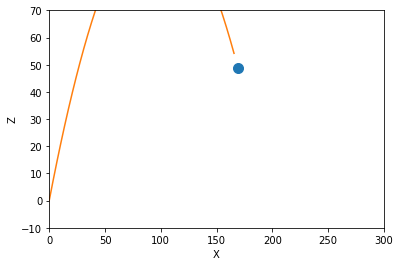

<Figure size 432x288 with 0 Axes>

In [21]:
from IPython import display
import time

for i in range(50):
    plt.xlim(0.,300.)
    plt.ylim(-10,70)
    plt.xlabel('X')
    plt.ylabel('Z')
    plt.plot(x[i],z[i],'o',markersize=10)
    plt.plot(x[0:i],z[0:i])
    #plt.scatter(x[0:i],z[0:i])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf().clear()
    time.sleep(0.1)



## Atividade

Uma forma conhecida de força de atrito que pode freiar o projetil é proporcional à velocidade do projetil elevada a uma potencia $n$, logo estaria dada por:

$$
F = - k m |v|^n \frac{{\bf v}}{|v|},
$$

onde o termo $-\frac{{\bf v}}{|v|}$  asegura que a força seja oposta ao movimento. As equações de movimento ficariam:

$$
\frac{d v_x}{dt} = -k v_x^n \frac{v_x}{|v|} \; \;,  \frac{d v_z}{dt} = -g - k v_z^n \frac{v_z}{|v|}
$$

$$
\frac{d x}{dt} = v_x \; \;,  \frac{d z}{dt} = v_z
$$

com, $|v| = \sqrt{v_x^2 + v_z^2}$.


1) Adicione as forças de atrito no código acima, verifique o resultado para $n=1$. Experimente com diferentes valores de $k$, e.g., $k=0.01$, $k=0.1$ e $k=1$.

2) O valor de $n=1$ é valido para baixas velocidades. Já para velocidades médias e
altas $n=3/2$ e $n=2$, respectivamente.  Aumente a velocidade inicial do projetil para $100$
e $200$ m/s e mude os valores de $n$ para cada caso. Estime o valor de $k$ de tal forma
que a força de atrito inicial seja a mesma nos três casos. 

### O pendulo simples

Vamos considerar um péndulo de massa $m$, no extremo de uma barra rigida de comprimento $l$ (veja figura).  A barra está fixa a um pivote, de tal forma que o pendulo se movimenta livremente no plano vertical sob a ação da gravidade.

<img src="Figs/pendulum.png" width=30% >

Novamente, a equação que descreve o movimento do péndulo é a lei de Newton:

$$
ml \frac{d^2 \theta}{dt^2} + mg \sin\theta = 0
$$

A velocidade angular e a aceleração estão dadas por:

$$
v = l \frac{d \theta}{dt} \; \; a = l \frac{d^2 \theta}{dt^2} 
$$

Para angulos pequenos podemos usar a aproximação

$$
\sin \theta \simeq \theta
$$

o que leva a

$$
\frac{d^2 \theta}{dt^2} = - \frac{g}{l} \theta
$$

Vamos a investigar inicialmente a solução dessa equação, para a qual sabemos que

$$
T = \frac{2 \pi}{\sqrt{l/g}}
$$



No entanto, para um pendulo esperamos que seu movimento eventualmente vai parar devido a empuxo viscoso do ar. A equação acima fica então:

$$
ml \frac{d^2 \theta}{dt^2} + \nu \frac{d \theta}{dt} +  mg \sin\theta = 0
$$

De forma similar aos circuitos eletricos, uma forma de manter o movimento a pesar da viscosidade, podemos adicionar um termo de forçamento

$$
ml \frac{d^2 \theta}{dt^2} + \nu \frac{d \theta}{dt} + mg \sin\theta = A \cos(\omega t)
$$

Onde $A$ e $\omega$ representam a amplitude e a frequencia angular do forçamento, repeitivamente. 

Vamos definir a frequencia natural do péndulo como:

$$
\omega_0 = \sqrt(g/l)
$$

E levar todo o sistema a uma forma não dimensional. Isto normalmente é util para ter grandeças que no computador diminuam os erros de *roundoff*.

$$
{\hat t} = \omega_0 t \;, \; {\hat \omega} = \frac{\omega}{\omega_0}
$$

Também definimos o fator de qualidade do pendulo, e a amplitude não dimensional do forçamento.

$$
Q = \frac{mg}{\omega_0 \nu} \;, \; {\hat A} = \frac{A}{mg}.
$$


Dessa forma, a equção do péndulo fica:

$$
\frac{d^2 \theta}{d{\hat t}^2} + \frac{1}{Q} \frac{d \theta}{d {\hat t}} + \sin\theta = {\hat A} \cos ({\hat \omega} {\hat t}) 
$$

A qual pode ser escrita em forma de duas equações de primeira ordem:

$$
\frac{d \theta}{d {\hat t}} = {\hat v}
$$

$$
\frac{d {\hat v}}{dt} = - \frac{{\hat v}}{Q} - \sin\theta + {\hat A} \cos ({\hat \omega} {\hat t}) 
$$

Essas são as equações que devem ser resolvidas. O fator de qualidade, $Q$, representa o número aproximado de oscilações que acontecerão no sistema sem forçamento, antes do pendulo parar devido à viscosidade.  A amplitude ${\hat A}$ é medida em termos do torque gravitacional máximo, enquanto que a frequencia, ${\hat w}$ é medida em termos da frequencia natural do pendulo. 

Vamos usar os seguintes parâmetros: $Q = 2$,  ${\hat w} = 2/3$ e inicialmente ${\hat A} = 0$.





In [35]:
def pendulo(angle=10.):
    tmin = 0.
    tmax = 10.*np.pi
    n = 1000
    m = 2
    #tempo
    t = np.linspace(tmin,tmax,n)
    dt = t[1] - t[0]
    #variaveis
    
    #u0[0] = theta
    #u0[1] = v
    
    u0 = np.zeros([m])
    u1 = np.zeros_like(u0)
    
    theta = np.zeros([n])
    v = np.zeros([n])
    
    angle = angle*np.pi/180.
    
    #condicoes iniciais
    u0[0] = angle
    u0[1] = 0.
    
    #evoluir no tempo
    for i in range(n):
        theta[i] = u0[0]
        v[i]     = u0[1]
        
        u1 = rk4vec( t[i], m, u0, dt, pend_f)
    
        u0 = np.copy(u1)
    
    return theta, v, t

In [36]:
def pend_f(t,m,u):
    
    uprime = np.zeros_like(u)
    
    Q = 10.
    w = 2./3.
    A = 0.
    
    uprime[0] =  u[1]
    uprime[1] = -u[1]/Q - np.sin(u[0]) + A*np.cos(w*t)
    
    return uprime

In [37]:
theta,v,t = pendulo(angle = 7.)

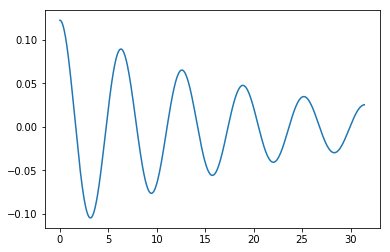

In [38]:
plt.plot(t,theta)

## Atividade

1. Crie uma animação que permita visualizar os resultados do modelo do péndulo


### Atividade

1. O modulo scipy tem rotinas para resolver sistemas de equações diferenciais parciais. Utilize `scipy.integrate.odeint` para integrar o sistema de equações do péndulo.  Compare os resultados com aqueles obtidos com a rotina RK4.



In [2]:
import scipy.integrate as si

In [4]:
si.odeint?